# 13wk-49: 키와 몸무게 (결측치, 성별교호작용) / 자료분석(Autogluon)

최규빈  
2023-12-01

# 1. 강의영상

[???](???)

# 2. Imports

In [1]:
#!pip install autogluon.eda

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [12]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_test.csv')

In [13]:
df_train.head()

`-` 중간고사 문제였죠?

`-` 자료컨셉

-   성별간 교호작용 존재
-   결측치 존재 (성별로 결측치를 처리해야 좋았음)

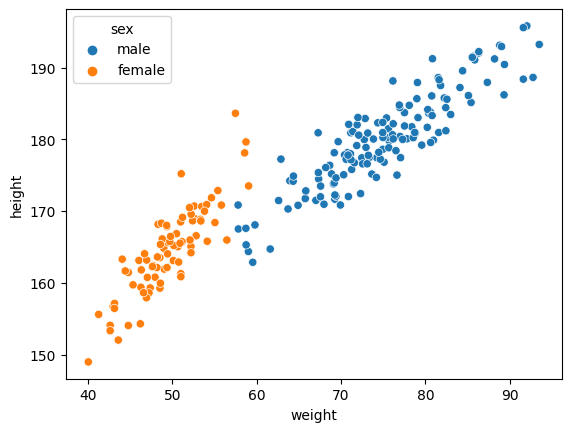

In [20]:
sns.scatterplot(df_train, x='weight',y='height',hue='sex')

# 4. 적합

In [21]:
# step1 -- pass
# step2 
predictr = TabularPredictor(label = 'height')
# step3 
predictr.fit(df_train,num_gpus=1)
# step4 
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_184850/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231130_184850/"
AutoGluon Version:  0.8.1
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
Disk Space Avail:   1585.65 GB / 1887.51 GB (84.0%)
Train Data Rows:    280
Train Data Columns: 2
Label Column: height
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
    Label info (max, min, mean, stddev): (195.79716947992372, 148.97529810482766, 174.60543, 9.4301)
    If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fittin

[1000]  valid_set's rmse: 3.05149

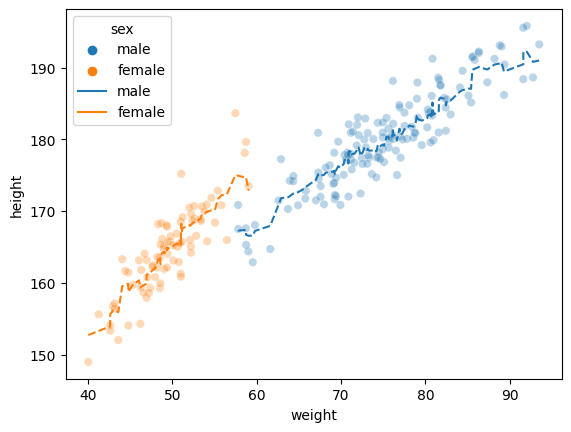

In [22]:
sns.scatterplot(df_train, x='weight',y='height',hue='sex',alpha=0.3)
sns.lineplot(df_train,x='weight',y=yhat,hue='sex',linestyle='--')

In [24]:
predictr.leaderboard(silent=True)

# 5. 해석 및 시각화

## A. y의 분포, (X,y)의 관계 시각화

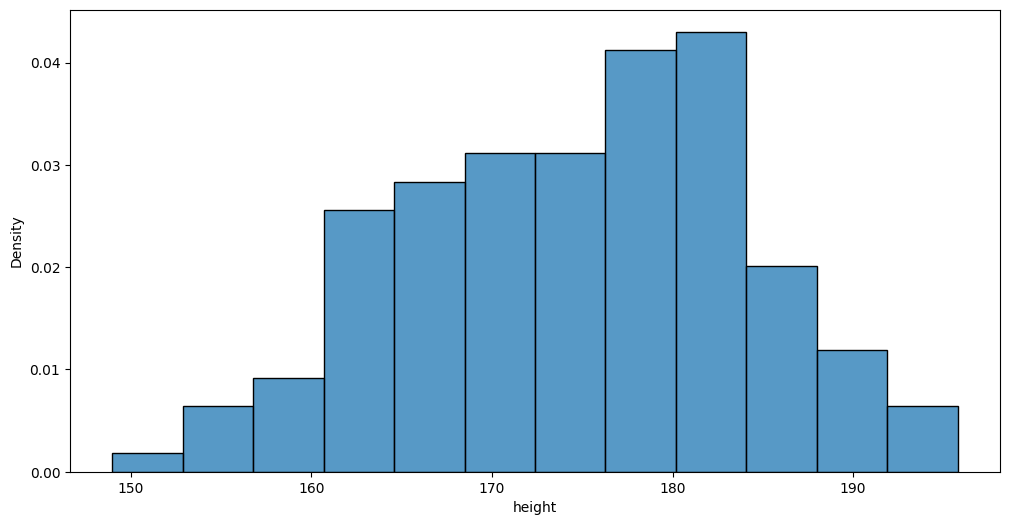

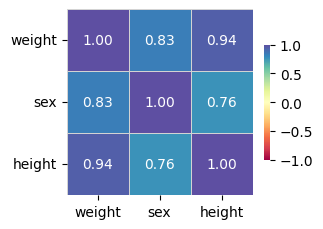

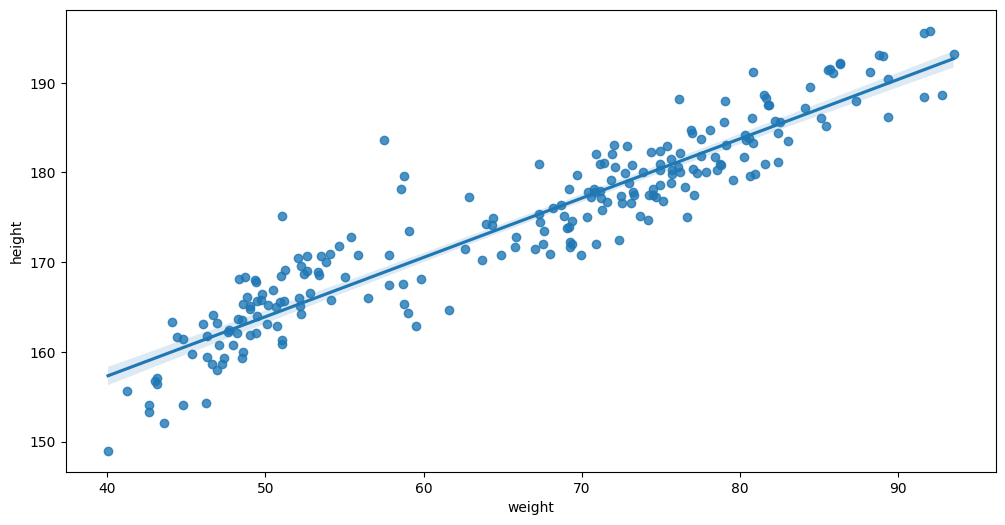

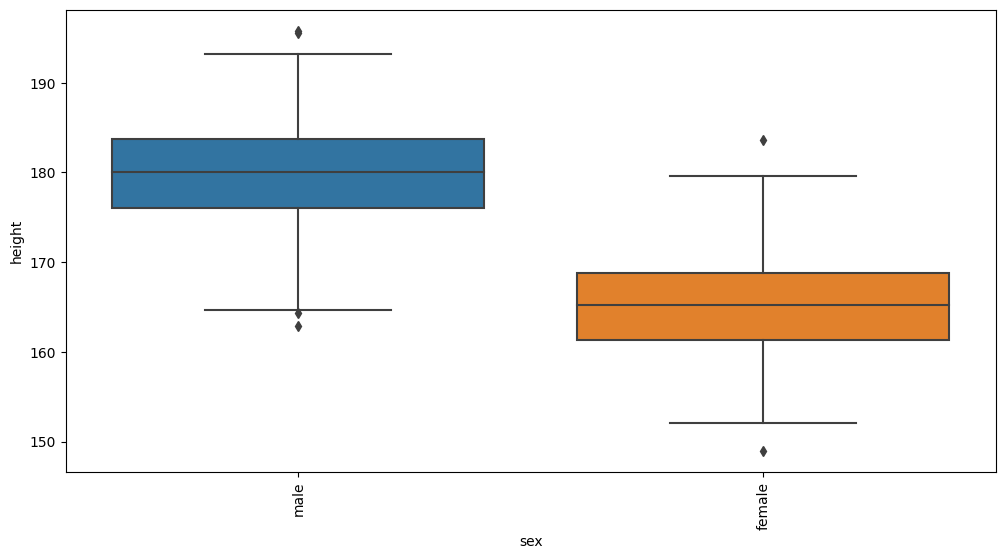

In [25]:
auto.target_analysis(
    train_data=df_train, 
    label='height',
    fit_distributions=False
)

## B. 중요한 설명변수?

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_185031/"

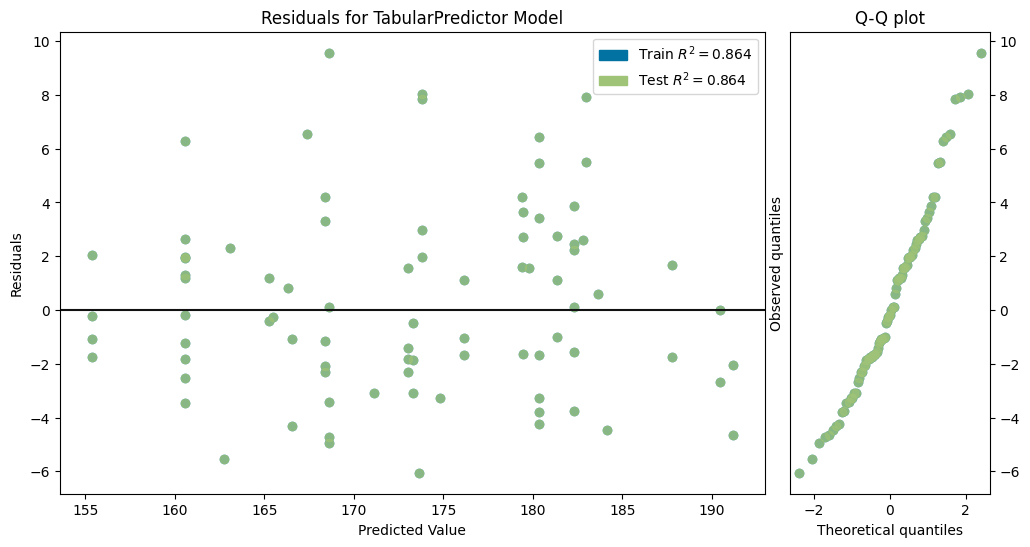

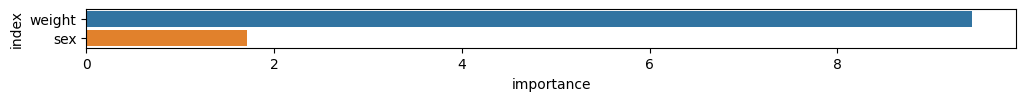

In [26]:
auto.quick_fit(
    train_data = df_train, 
    label='height',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석

### 0번 obs

`-` 0번 observation

In [35]:
df_train.iloc[[0]]

In [36]:
predictr.predict(df_train.iloc[[0]])

-   왜 178.368637로 예측했을까?

`-` 해석

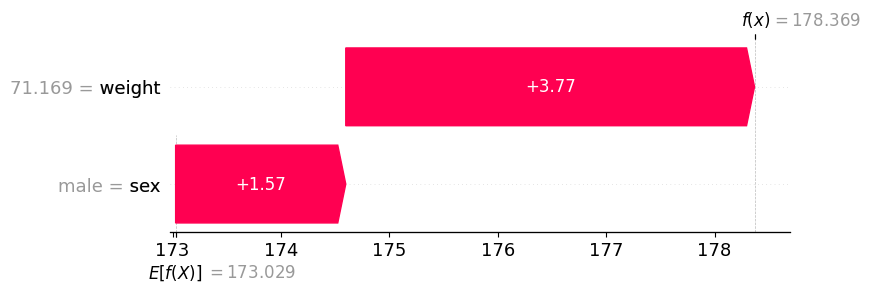

In [31]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=df_train.iloc[[0]]
)

-   일단 평균값인 173.029로 적합
-   sex를 고려하여 +1.57
-   weight를 고려하여 +3.77
-   최종적으로는 178.369

### 208번 obs

`-` 0번 observation

In [41]:
df_train.iloc[[208]]

In [42]:
predictr.predict(df_train.iloc[[208]])

-   왜 169.037048로 예측했을까?

`-` 해석

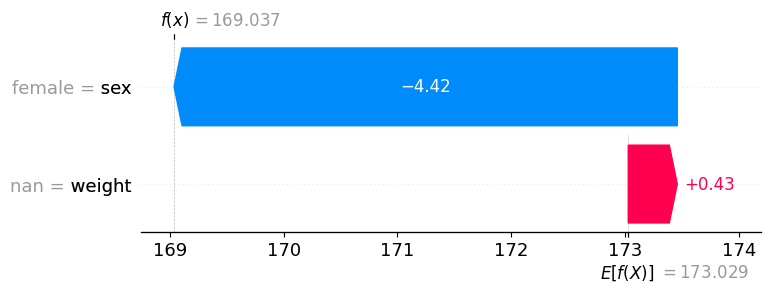

In [43]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=df_train.iloc[[208]]
)

-   일단 평균인 173.029로 적합
-   `sex`를 고려하여 -4.42
-   `weight`를 고려하여 +0.43

> 결측값을 그냥 하나의 관측치로 해석함 (nan이라는 값을 가지고 있다고
> 해석해버림!!)

> 이게 왜 가능하지? (이런걸 가능하게 하는 테크닉 많아요, 쉽게 생각해서
> nan을 -9999로 처리하고 tree를 돌린다고 생각해보세요..)

### 211번 obs

`-` 0번 observation

In [49]:
df_train.iloc[[211]]

In [50]:
predictr.predict(df_train.iloc[[211]])

`-` 해석

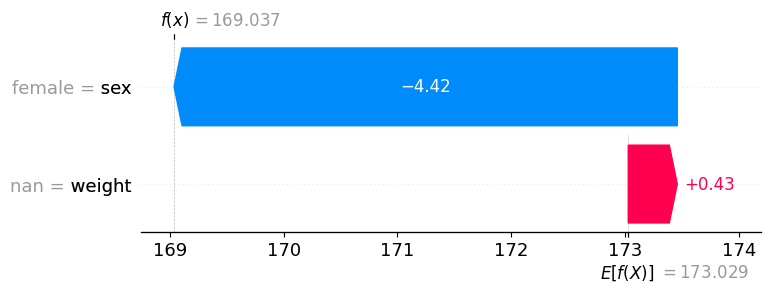

In [51]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=df_train.iloc[[211]]
)

-   일단 평균인 173.029로 적합
-   `sex`를 고려하여 -4.42
-   `weight`를 고려하여 +0.43
-   208번과 적합값이 같음!! (이거 합리적임..)

`-` 우리가 생각한 현실적인 적합은 사실 이러함

In [57]:
df_train[df_train.sex == 'female'].weight.mean()

In [61]:
onerow = df_train.iloc[[211]].copy()
onerow.weight = 49.567060917121516
onerow

In [63]:
predictr.predict(onerow)

-   우리가 생각한 방법과 같지 않지만 거의 대등한 효과를 준다!
-   놀라운점은 데이터에 대한 어떠한 전처리도 필요하지 않다는것!

### 198번 obs

`-` 0번 observation

In [44]:
df_train.iloc[[198]]

In [45]:
predictr.predict(df_train.iloc[[198]])

`-` 해석

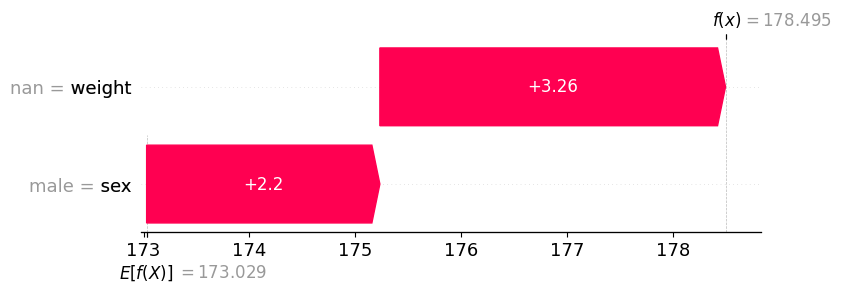

In [46]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=df_train.iloc[[198]]
)

-   일단 평균인 173.029로 적합
-   `sex`를 고려하여 +2.2
-   `weight`를 고려하여 +3.26